In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt,pylab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_precision_recall_curve,mean_squared_error

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# data['TotalCharges']=data['TotalCharges'].map({" ":0})

In [8]:
data.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

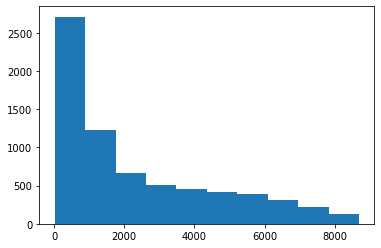

In [9]:
p_data = data['TotalCharges'].replace(' ',np.nan).astype(float).values
plt.hist(p_data)

In [10]:
 data['TotalCharges'] = data['TotalCharges'].replace(' ',np.nan).astype(float).values

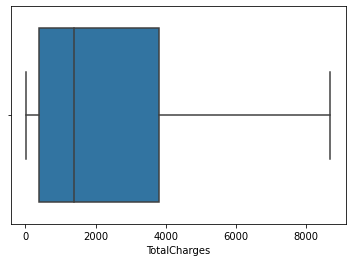

In [11]:
sns.boxplot(data['TotalCharges'])
plt.show()


In [12]:
data['TotalCharges'].mean()

2283.3004408418697

In [13]:
data['TotalCharges'].median()

1397.475

In [14]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].median())

In [15]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
data.SeniorCitizen.unique()

array([0, 1])

In [19]:
data.SeniorCitizen.nunique()

2

In [20]:
data['SeniorCitizen']=data['SeniorCitizen'].map({0:'No',1:"yes"})

In [21]:
data['SeniorCitizen'].unique()

array(['No', 'yes'], dtype=object)

In [22]:
databackup = data.copy()

In [23]:
data.drop('customerID',axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:
x = data.drop('Churn',axis=1)

In [25]:
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [26]:
X= pd.get_dummies(x,drop_first=True)

In [27]:
# y = data['Churn']

In [28]:
y =  data['Churn']=data['Churn'].map({"Yes":2,"No":3})

In [29]:
X.shape

(7043, 7072)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = model.predict(x_test)

In [34]:
confusion_matrix(y_test,y_pred)

array([[ 327,  247],
       [ 159, 1380]])

In [35]:
accuracy_score(y_test,y_pred) 

0.8078561287269286

In [36]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           2       0.67      0.57      0.62       574\n           3       0.85      0.90      0.87      1539\n\n    accuracy                           0.81      2113\n   macro avg       0.76      0.73      0.74      2113\nweighted avg       0.80      0.81      0.80      2113\n'

In [37]:
y_test

185     2
2715    3
3825    3
1807    2
132     3
       ..
5522    2
6377    2
5500    3
2392    3
6705    3
Name: Churn, Length: 2113, dtype: int64

In [38]:
Result = pd.DataFrame(columns=['Actual',"predicted"])

In [39]:
Result['Actual']=y_test
Result['predicted']=y_pred
Result['id']=Result.index
Result.head()

,Actual,predicted,id
185,2,2,185
2715,3,3,2715
3825,3,3,3825
1807,2,2,1807
132,3,3,132


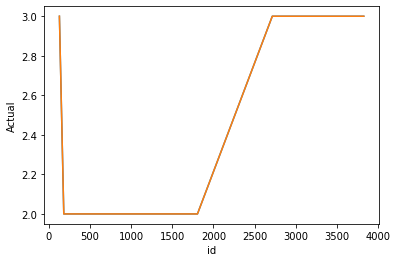

In [40]:
Result['Actual']=y_test
Result['predicted']=y_pred
Result['id']=Result.index
Result.head()
sns.lineplot(x='id',y='Actual',data=Result.head())
sns.lineplot(x='id',y='predicted',data=Result.head())
plt.show()

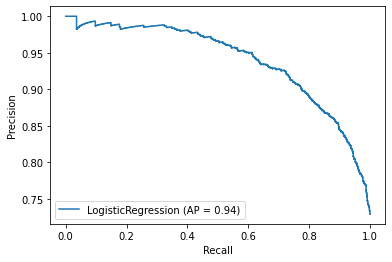

In [41]:
plot_precision_recall_curve(model,x_test,y_test)

In [42]:
model.predict(x_test.head())

array([2, 3, 3, 2, 3])

In [43]:
cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()

0.8026369168356997

In [44]:
penalty = ['l1', 'l2', 'elasticnet']

In [45]:
solver =  ['sag', 'saga']

In [46]:
parameter_LR = {'solver':solver,'penalty':penalty} 

In [47]:
grid_search = GridSearchCV(model,parameter_LR,cv=10)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'sag'}

In [51]:
final_model =  LogisticRegression(penalty ='l2', solver='sag')

In [52]:
final_model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred_new = final_model.predict(x_test)

In [54]:
confusion_matrix(y_test,y_pred_new)

array([[ 286,  288],
       [ 206, 1333]])

In [55]:
accuracy_score(y_test,y_pred_new)

0.7662091812588736

In [56]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           2       0.67      0.57      0.62       574\n           3       0.85      0.90      0.87      1539\n\n    accuracy                           0.81      2113\n   macro avg       0.76      0.73      0.74      2113\nweighted avg       0.80      0.81      0.80      2113\n'

In [57]:
# alpha = [1e-10,1e-15,1e-20,1e-5,1e-25,1,2,5,8,10,15,20,25]

In [58]:
# parameter = {'alpha':alpha}

In [59]:
ridgeNew =   Ridge()

In [60]:
parameter = {'alpha':[1e-10,1e-15,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,100]}

In [61]:
gridsearch_result = GridSearchCV(ridgeNew,parameter,scoring='neg_mean_squared_error',cv=5)

In [62]:
gridsearch_result.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-15, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 35, 40, 45, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [64]:
gridsearch_result.best_params_


{'alpha': 50}

In [65]:
gridsearch_result.best_estimator_

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [68]:
gridsearch_result.best_score_

-0.14226908889740145